In [1]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

## 使用するデータを準備しよう

In [2]:
import cv2
import numpy as np
import os
from glob import glob

Path = glob("/content/drive/My Drive/Colab Notebooks/face/*/")

# 空のリストを準備
data = []
label = [] 
class_num = 0

# 画像サイズ
image_size = 28

def append_data(directory, class_num):
    # 例：['KA.AN2.40.jpg', 'KA.AN3.41.jpg',,,,,'KL.AN2.168.jpg', 'KL.AN3.169.jpg']
    files = os.listdir(directory)  # ディレクトリの中をファイルを全てリストにする
    print(files)
    for image in files:
        if image.endswith(".jpg"): # jpg画像だけを抽出
            image = cv2.imread(directory + image) # 画像を準備
            image = cv2.resize(image, (image_size, image_size)) # リサイズ
            image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # グレースケール
            image_gs = image_gs.flatten() # リストを平坦化     
            data.append(image_gs)  # 学習用データに代入
            label.append(class_num)  # 学習用データのラベルに代入
                
for fil in Path:
    append_data(fil, class_num)
    class_num += 1

print(label)

['KA.SU3.38.jpg', 'KL.SU1.164.jpg', 'KA.SU1.36.jpg', 'KL.SU2.165.jpg', 'KA.SU2.37.jpg', 'KM.SU1.14.jpg', 'KM.SU2.15.jpg', 'KL.SU3.166.jpg', 'KM.SU3.16.jpg', 'KR.SU3.82.jpg', 'MK.SU2.123.jpg', 'KR.SU2.81.jpg', 'MK.SU3.124.jpg', 'NA.SU1.208.jpg', 'NA.SU2.209.jpg', 'MK.SU1.122.jpg', 'KR.SU1.80.jpg', 'NA.SU3.210.jpg', 'NM.SU1.101.jpg', 'NM.SU2.102.jpg', 'NM.SU3.103.jpg', 'TM.SU1.187.jpg', 'TM.SU2.188.jpg', 'TM.SU3.189.jpg', 'UY.SU2.144.jpg', 'UY.SU1.143.jpg', 'YM.SU1.58.jpg', 'UY.SU3.145.jpg', 'YM.SU2.59.jpg', 'YM.SU3.60.jpg']
['KM.SA1.9.jpg', 'KA.SA1.33.jpg', 'KL.SA3.163.jpg', 'KL.SA1.161.jpg', 'KA.SA3.35.jpg', 'KA.SA2.34.jpg', 'KL.SA2.162.jpg', 'KM.SA3.11.jpg', 'KM.SA2.10.jpg', 'KM.SA5.13.jpg', 'KR.SA1.77.jpg', 'NA.SA1.205.jpg', 'KR.SA3.79.jpg', 'MK.SA1.119.jpg', 'KR.SA2.78.jpg', 'MK.SA2.120.jpg', 'MK.SA3.121.jpg', 'NA.SA2.206.jpg', 'NA.SA3.207.jpg', 'NM.SA1.98.jpg', 'TM.SA3.186.jpg', 'UY.SA2.141.jpg', 'TM.SA2.185.jpg', 'NM.SA3.100.jpg', 'NM.SA2.99.jpg', 'TM.SA1.184.jpg', 'UY.SA1.140.jpg

## CNNに適用する型に変更しよう

In [3]:
# データ型を変更
data = np.array(data, dtype=np.float32)
label = np.array(label, dtype=np.float32)

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data,label, 
                                                                  random_state = 1, 
                                                                  stratify = label, 
                                                                  test_size = 0.2)

# 学習データのリストを変形  #.reshape(データの数, 縦のサイズ, 横のサイズ, 次元)
train_data = train_data.reshape((len(train_data)),image_size,image_size,1)
test_data = test_data.reshape((len(test_data)),image_size,image_size,1)

# 学習データを正規化
train_data /= 255 # to 0-1
test_data /= 255 # to 0-1

# ラベルデータをone-hot 変換
from keras.utils.np_utils import to_categorical
train_label = to_categorical(train_label, num_classes = 5)
test_label = to_categorical(test_label, num_classes = 5)

print(train_data.shape, train_label.shape, test_data.shape, test_label.shape) 

test_label

(121, 28, 28, 1) (121, 5) (31, 28, 28, 1) (31, 5)


Using TensorFlow backend.


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

## ニューラルネットワークのモデルを作成しよう

In [4]:
from tensorflow.keras import models,layers
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(20, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(50, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

## モデルをコンパイルしよう

In [5]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ["accuracy"])

## 機械学習を実行するプログラムを作成しよう

In [6]:
epoch = 100
batchsize = 25

# 学習
history = model.fit(train_data, train_label, batch_size=batchsize, 
                    epochs=epoch, verbose=2, 
                    validation_data=(test_data, test_label))

Epoch 1/100
5/5 - 0s - loss: 1.7051 - accuracy: 0.1818 - val_loss: 1.6125 - val_accuracy: 0.1935
Epoch 2/100
5/5 - 0s - loss: 1.6129 - accuracy: 0.2149 - val_loss: 1.6086 - val_accuracy: 0.2258
Epoch 3/100
5/5 - 0s - loss: 1.6047 - accuracy: 0.2479 - val_loss: 1.6041 - val_accuracy: 0.3548
Epoch 4/100
5/5 - 0s - loss: 1.5903 - accuracy: 0.3223 - val_loss: 1.5945 - val_accuracy: 0.3226
Epoch 5/100
5/5 - 0s - loss: 1.5711 - accuracy: 0.3058 - val_loss: 1.5760 - val_accuracy: 0.3226
Epoch 6/100
5/5 - 0s - loss: 1.5563 - accuracy: 0.3719 - val_loss: 1.5550 - val_accuracy: 0.3226
Epoch 7/100
5/5 - 0s - loss: 1.5131 - accuracy: 0.3058 - val_loss: 1.5420 - val_accuracy: 0.3871
Epoch 8/100
5/5 - 0s - loss: 1.4423 - accuracy: 0.3636 - val_loss: 1.4975 - val_accuracy: 0.2903
Epoch 9/100
5/5 - 0s - loss: 1.3910 - accuracy: 0.3967 - val_loss: 1.5007 - val_accuracy: 0.2903
Epoch 10/100
5/5 - 0s - loss: 1.3558 - accuracy: 0.4463 - val_loss: 1.6239 - val_accuracy: 0.1935
Epoch 11/100
5/5 - 0s - loss:

## 早期終了を追加してみよう
※通常の学習終了後に追加、変更します。

In [7]:
# EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               min_delta= 0.01,
                               verbose=1)
                # monitor: 監視する値．
                # min_delta: 監視する値について改善として判定される最小変化値．
                # patience: 訓練が停止し，値が改善しなくなってからのエポック数

epoch = 100
batchsize = 25

# 学習
history = model.fit(train_data, train_label, batch_size=batchsize, 
                    epochs=epoch, verbose=2, 
                    validation_data=(test_data, test_label),
                    callbacks=[early_stopping])

## ネットワーク構成を確認しよう

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               2

## グラフを使って可視化しよう

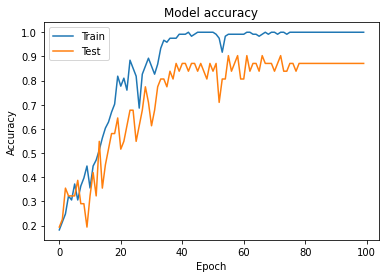

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## グラフを使って可視化しよう

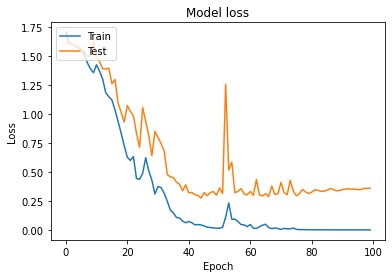

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## モデルを保存しよう

In [11]:
from keras.models import load_model

model.save('/content/drive/My Drive/my_model.h5')  # creates a HDF5 file 'my_model.h5'
